In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import tadasets
from presentation.result import RipserResult


In [4]:
def drawLineColored(X, C):
    for i in range(X.shape[0]-1):
        plt.plot(X[i:i+2, 0], X[i:i+2, 1], c=C[i, :], lineWidth = 3)

def plotCocycle2D(D, X, cocycle, thresh, width=20, height=10):
    """Plot the cocycle over the datapoints X.
    
    Given a 2D point cloud X, display a cocycle projected
    onto edges under a given threshold "thresh"
    
    :param D : distance matrix
    :param X : positions of my vertices
    :param cocycle: 
    :type  cocycle: numpy.ndarray(k,3)
    :param  thresh: draw only edges under the threshold length
    
    width & height: plot dimensions
    """
    N = X.shape[0]
    t = np.linspace(0, 1, 10)
    c = plt.get_cmap('Greys')
    plt.figure(figsize=(width,height))
    C = c(np.array(np.round(np.linspace(0, 255, len(t))), dtype=np.int32))
    C = C[:, 0:3]

    for i in range(N):
        for j in range(N):
            if D[i, j] <= thresh:
                Y = np.zeros((len(t), 2))
                Y[:, 0] = X[i, 0] + t*(X[j, 0] - X[i, 0])
                Y[:, 1] = X[i, 1] + t*(X[j, 1] - X[i, 1])
                drawLineColored(Y, C)
    # Plot cocycle projected to edges under the chosen threshold
    for k in range(cocycle.shape[0]):
        # this edge goes from vertex i to vertex j
        # we associate val to the edge
        [i, j, val] = cocycle[k, :]
        # if the distance between two vertices is less
        # than the threshold then we can plot it
        if D[i, j] <= thresh:
            i, j = min(i, j), max(i, j)
            a = 0.5*(X[i, :] + X[j, :])
            plt.text(a[0], a[1], '%g'%val, color='b', fontsize=18)
            
    # always plot vertex labels otherwise it gets too confusing
    for i in range(N):
        plt.text(X[i, 0], X[i, 1], '%i'%i, color='r', fontsize=18)
    plt.axis('equal')


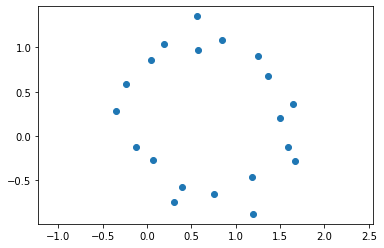

In [5]:
np.random.seed(9)
# x = tadasets.dsphere(n=12, d=1, noise=0.1)

N=20
t = np.linspace(0, 2 * np.pi ,N , endpoint=False)
a = np.transpose([0.5 + np.cos(t), np.sin(t)]) + 0.4 * np.random.random((N,2))
#b = np.transpose([-0.5 + np.cos(t), np.sin(t)]) + 0.4 * np.random.random((N,2))
x = a#np.concatenate([a,b])
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()


In [18]:
result = ripser(x, coeff=17, maxdim=2, do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']

In [7]:
def distance(i,j):
    return D[i,j]

In [11]:
r = RipserResult(x, result)
r.cocycles.C1

[<Representative : 1-chain, free sum of 21 elements>]

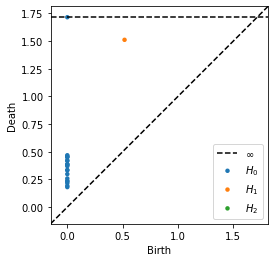

In [12]:
plot_diagrams(diagrams)

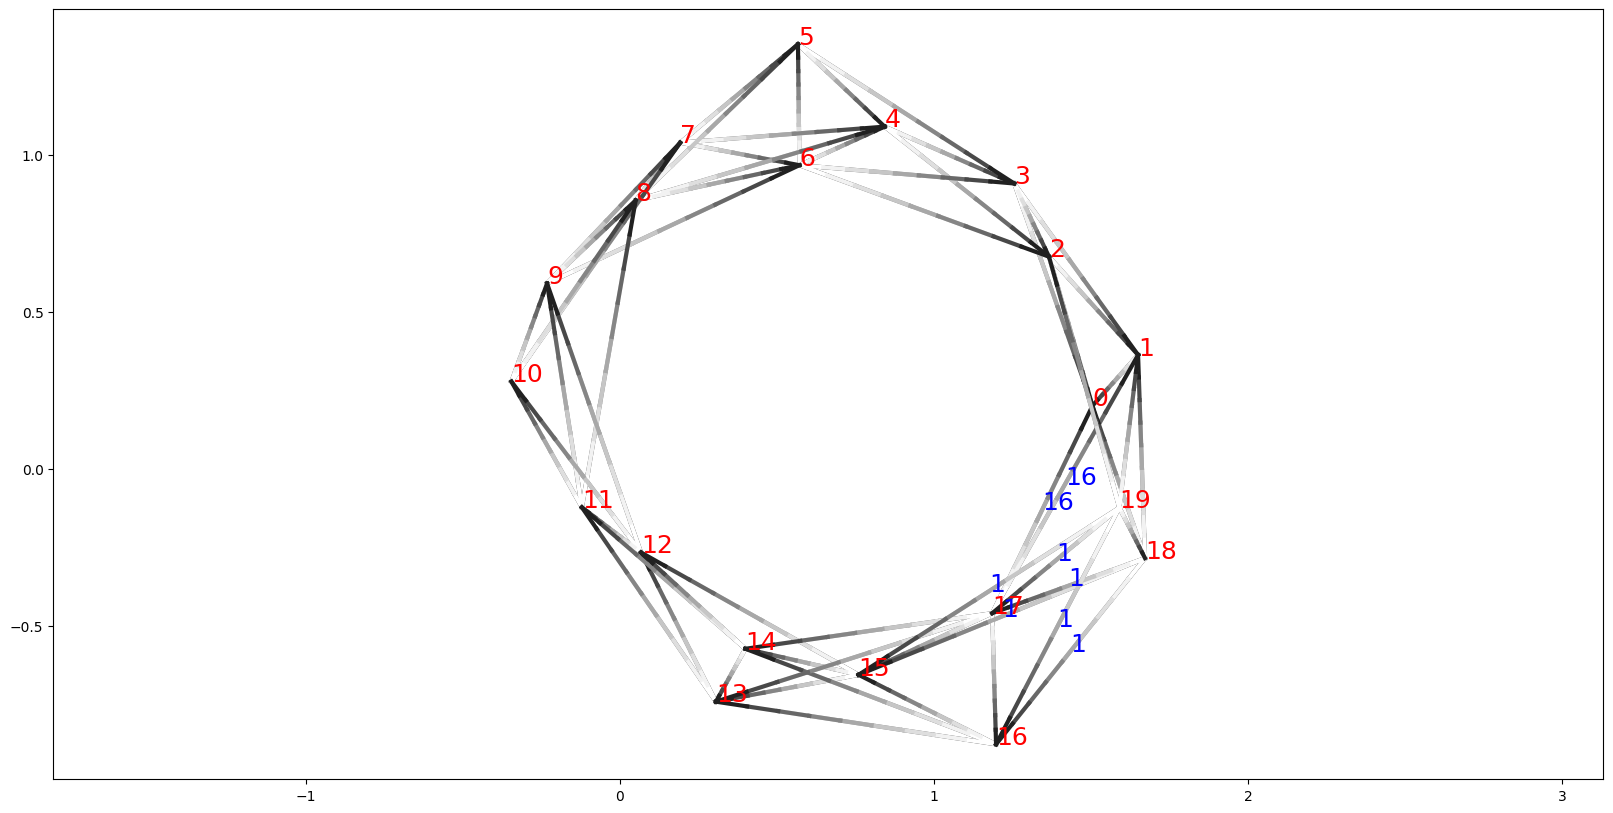

In [21]:
# here we plot the 1-co-cycle at time 1
plotCocycle2D(D, x, result['cocycles'][1][0], thresh=1)

In [22]:
# the same cycle but in algebraic notation
str(r.cocycles.C1[0].project(distance,1))

'1[18 17]+1[19 17]+16[17  0]+1[18 16]+1[19 16]+16[17  1]+1[18 15]+1[19 15]'